# Basic Logisitic Regression

In [1]:
#import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
%matplotlib inline
%config InlineBackend.figure_format='retina'

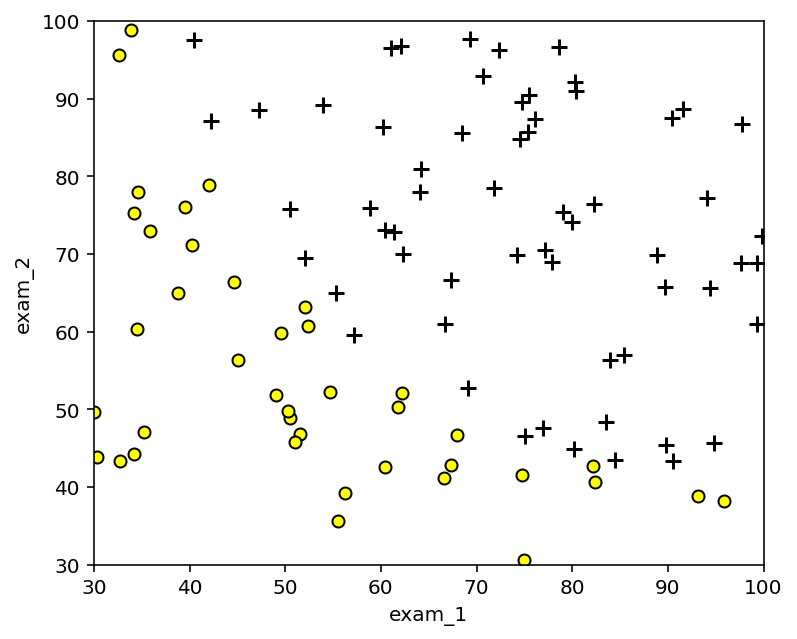

In [2]:
#import data
df = pd.read_csv('./data/logistic_regression.txt',names=['ex1','ex2','admit'])
x=np.array(df[['ex1','ex2']])
y=np.reshape(np.array(df['admit']),(np.shape(x)[0],1))
X=np.insert(x,[0],np.ones((np.shape(x)[0],1)),axis=1)

#visualize data
def plot(df):
    plt.figure(figsize=(6,5))
    _=plt.scatter(df[df['admit']==0]['ex1'],df[df['admit']==0]['ex2'],color='yellow',edgecolors='black')
    _=plt.scatter(df[df['admit']==1]['ex1'],df[df['admit']==1]['ex2'],color='black', marker='+',s=60)
    plt.xlabel('exam_1')
    plt.ylabel('exam_2')
    _=plt.xlim([30,100])
    _=plt.ylim([30,100])

plot(df)

In [3]:
#sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

#compute cost
def cost(theta,*args):
    x,y=args
    theta = np.reshape(theta,(np.shape(x)[1],1))
    return -(1/np.shape(x)[0])* np.sum((y*np.log(sigmoid(np.dot(x,theta)))+ (1-y)*np.log(1-sigmoid(np.dot(x,theta)))))

#compute gradient
def grad(theta,*args):
    x,y=args
    theta = np.reshape(theta,(np.shape(x)[1],1))
    return (1/np.shape(x)[0])* np.ndarray.flatten(np.dot(np.transpose(x),sigmoid(np.dot(x,theta)) - y))

In [4]:
#testing sigmoid and computeCost functions
initial_theta=np.zeros(X.shape[1])
print(initial_theta)
print(cost(initial_theta,X,y))
print(grad(initial_theta,X,y))

test_theta=np.array([[-24],[0.2],[0.2]])
print(cost(test_theta,X,y))

[0. 0. 0.]
0.6931471805599453
[ -0.1        -12.00921659 -11.26284221]
0.21833019382659785


In [5]:
#optimize using BFGS method
res = optimize.minimize(fun=cost, x0=initial_theta, args=(X,y), jac=grad, method='BFGS', options={'maxiter':400, 'disp':True})
print(res['x'])

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31
[-25.16133284   0.2062317    0.2014716 ]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


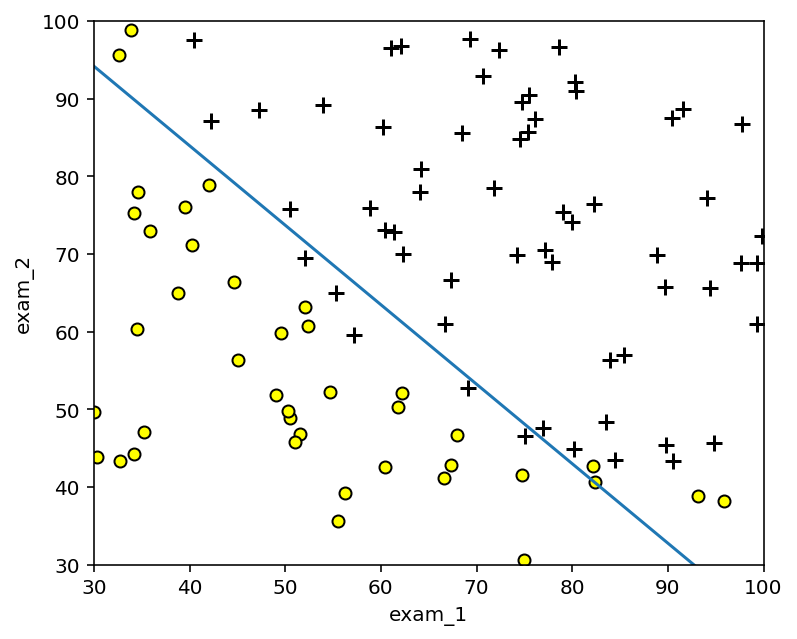

In [6]:
#plot decision boundary
plot(df)
x1=np.linspace(30,100)
x2=-(1/res['x'][2])*(res['x'][0]+res['x'][1]*x1)
plt.plot(x1,x2)

In [7]:
#evaluate with the trained model
x_test = np.array([1,45,85])
print('prob of admission = {:.3f}'.format(sigmoid(np.dot(x_test,res['x']))))

prob of admission = 0.776


In [8]:
#accuracy on training set
def predict(theta,x,y):
    theta=np.reshape(theta,(np.shape(x)[1],1))
    y_pred=sigmoid(np.dot(x,theta))
    y_pred[y_pred<0.5] = 0
    y_pred[y_pred>=0.5] = 1
    y_pred = y_pred.astype(int)
    return (1-np.sum(np.abs(y_pred-y))/np.size(y))*100

print('Accuracy on training set = {}%'.format(predict(res['x'],X,y)))

Accuracy on training set = 89.0%


# Logistic Regression with Regularization

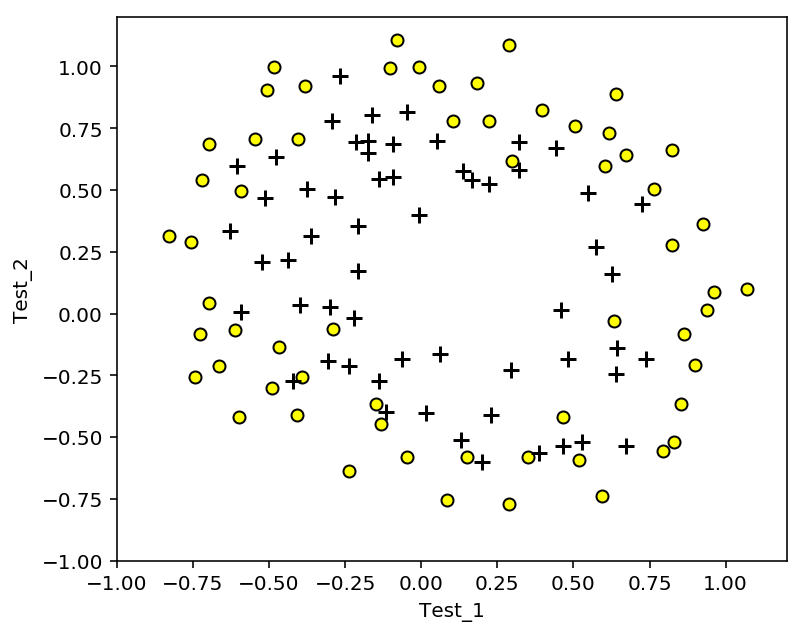

In [9]:
#import data
df2 = pd.read_csv('./data/logistic_regression_reg.txt',names=['t1','t2','accept'])

#visualize data
def plot(df):
    plt.figure(figsize=(6,5))
    _=plt.scatter(df[df['accept']==0]['t1'],df[df['accept']==0]['t2'],color='yellow',edgecolors='black')
    _=plt.scatter(df[df['accept']==1]['t1'],df[df['accept']==1]['t2'],color='black', marker='+',s=60)
    plt.xlabel('Test_1')
    plt.ylabel('Test_2')
    _=plt.xlim([-1,1.2])
    _=plt.ylim([-1,1.2])

plot(df2)

In [10]:
#create 28-dimensional feature vector
def map_feature(x,degree=6):
    out=np.ones((np.shape(x)[0],1))
    for i in range(1,degree+1):
        for j in range(i+1):
            x1 = np.reshape(x[:,0],(np.size(x[:,0]),1))
            x2 = np.reshape(x[:,1],(np.size(x[:,1]),1))
            out=np.append(out,x1**(i-j)*x2**j,axis=1)
    return out

x=np.array(df2[['t1','t2']])
y=np.reshape(np.array(df2['accept']),(np.shape(x)[0],1))
X=map_feature(x,6)
print(np.shape(X))

(118, 28)


In [11]:
#compute cost
def cost_reg(theta,*args):
    x,y,lambd = args
    m = np.shape(x)[0]
    theta = np.reshape(theta,(np.shape(x)[1],1))
    y_hat = sigmoid(np.dot(x,theta))
    cost = (-(1/m)* np.sum((y*np.log(y_hat)+ (1-y)*np.log(1-y_hat)))
            + ((lambd/(2*m))* np.sum(theta[1:,0]**2)))
    return cost

#compute gradients
def grad_reg(theta,*args):
    x,y,lambd = args
    m = np.shape(x)[0]
    theta = np.reshape(theta,(np.shape(x)[1],1))
    y_hat = sigmoid(np.dot(x,theta))
    theta_dummy = np.copy(theta)
    theta_dummy[0,0]=0 
    grad = ((1/m)* (np.dot(np.transpose(x),y_hat - y)) +
            (lambd/m)*theta_dummy)
    return np.ndarray.flatten(grad)

In [12]:
#test cost and grad functions
initial_theta = np.zeros((np.shape(X)[1]))
cost = cost_reg(initial_theta,X,y,10)
print(cost)
grad = grad_reg(initial_theta,X,y,10)
print(grad[:5])

test_theta = np.ones((np.shape(X)[1]))
cost = cost_reg(test_theta,X,y,10)
print(cost)
grad = grad_reg(test_theta,X,y,10)
print(grad[:5])

0.6931471805599454
[8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]
3.1645093316150095
[0.34604507 0.16135192 0.19479576 0.22686278 0.09218568]


In [13]:
#plot decision boundary
theta_optimum = np.reshape(res['x'],(np.size(res['x']),1))

def plot_decision_boundary(df,theta_optimum):
    plot(df)
    x1=np.linspace(-1,1.5)
    x2=np.linspace(-1,1.5)
    xx, yy= np.meshgrid(x1,x2)
    z = np.zeros((np.size(x1),np.size(x2)))
    for i,x in enumerate(x1):
        for j,y in enumerate(x2):
            x_ij = np.array([[x,y]])
            X_ij = map_feature(x_ij,6)
            z[i,j] = np.dot(X_ij,theta_optimum)[0][0]
    plt.contour(xx,yy,z,0,colors='green')

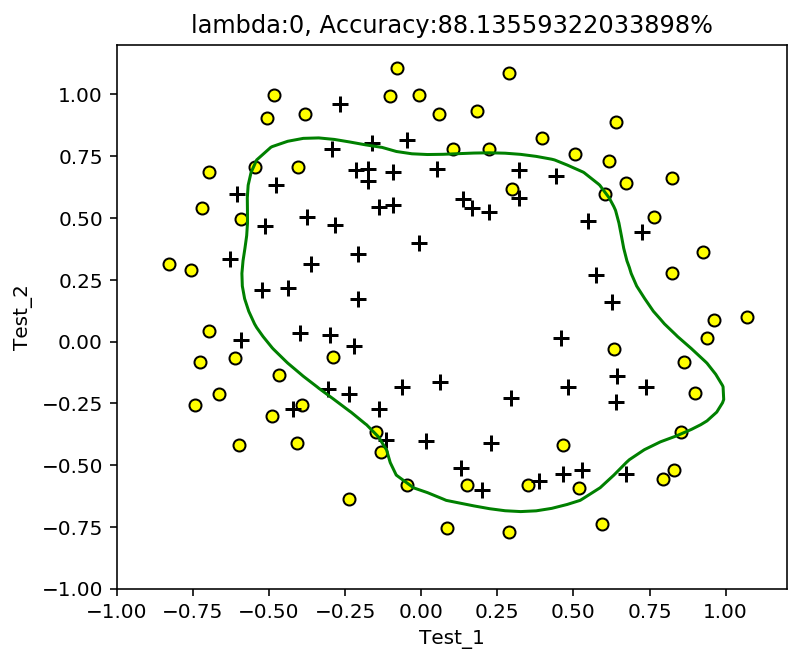

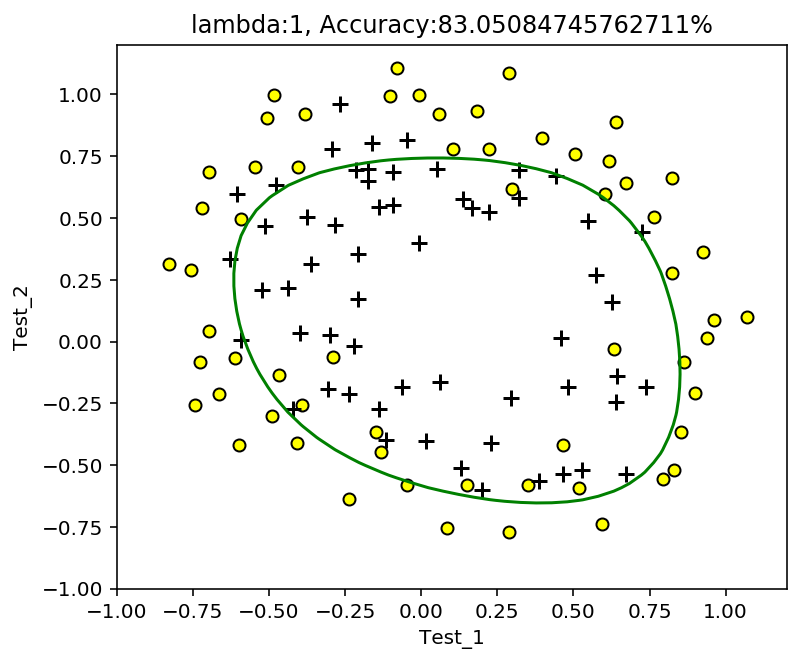

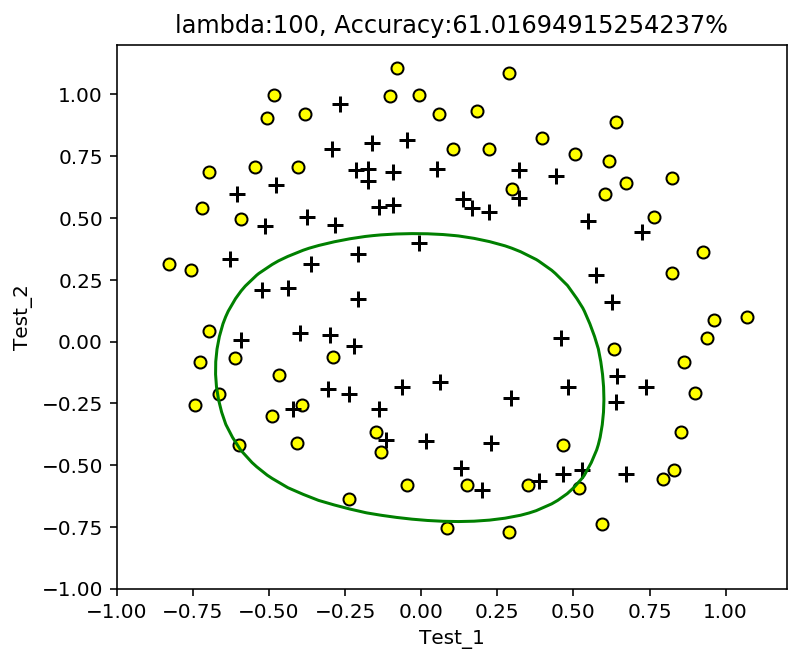

In [14]:
for lambd in [0,1,100]:
    res = optimize.minimize(fun=cost_reg, x0=initial_theta, args=(X,y,lambd), jac=grad_reg, method=None, options={'maxiter':400, 'disp':False})
    theta_optimum = np.reshape(res['x'],(np.size(res['x']),1))
    plot_decision_boundary(df2,theta_optimum)
    plt.title('lambda:{}, Accuracy:{}%'.format(lambd,predict(theta_optimum,X,y)))